# Extensive Analysis + Visualization with Python

## Table of Contents


The table of contents for this project are as follows: -

1.	[Introduction to EDA](#1)
1.	[Objectives of EDA](#2)
1.	[Types of EDA](#3)
1.  [Import libraries](#4)
1.	[Import dataset](#5)
1.	[Exploratory data analysis](#6)
      - [Check shape of the dataset](#6.1)
	  - [Preview the dataset](#6.2)
	  - [Summary of dataset](#6.3)
      - [Dataset description](#6.4)
      - [Check data types of columns](#6.5)
      - [Important points about dataset](#6.6)
      - [Statistical properties of dataset](#6.7)
      - [View column names](#6.8)
1.	[Univariate analysis](#7)
      - [Analysis of `target` feature variable](#7.1)
      - [Findings of univariate analysis](#7.2)
1.	[Bivariate analysis](#8)
      - [Estimate correlation coefficients](#8.1)
      - [Analysis of `target` and `cp` variable](#8.2)
      - [Analysis of `target` and `thalach` variable](#8.3)
      - [Findings of bivariate analysis](#8.4)
1.	[Multivariate analysis](#9)
      - [Heat Map](#9.1)
      - [Pair Plot](#9.2)
1.	[Dealing with missing values](#10)
      - [Pandas isnull() and notnull() functions](#10.1)
      - [Useful commands to detect missing values](#10.2)
1.	[Check with ASSERT statement](#11)
1.	[Outlier detection](#12)
1.	[Conclusion](#13) 
1.	[References](#14)



## 1. Introduction to EDA <a class="anchor" id="1"></a>

[Back to Table of Contents](#0.1)


Several questions come to mind when we come across a new dataset.  The below list shed light on some of these questions:-

•	What is the distribution of the dataset?

•	Are there any missing numerical values, outliers or anomalies in the dataset?

•	What are the underlying assumptions in the dataset?

•	Whether there exists relationships between variables in the dataset?

•	How to be sure that our dataset is ready for input in a machine learning algorithm?

•	How to select the most suitable algorithm for a given dataset?

So, how do we get answer to the above questions? 


The answer is **Exploratory Data Analysis**. It enable us to answer all of the above questions.


## 2. Objectives of EDA <a class="anchor" id="2"></a>

[Back to Table of Contents](#0.1)


The objectives of the EDA are as follows:-

i. To get an overview of the distribution of the dataset.

ii. Check for missing numerical values, outliers or other anomalies in the dataset.

iii.Discover patterns and relationships between variables in the dataset.

iv. Check the underlying assumptions in the dataset.


## 3. Types of EDA <a class="anchor" id="3"></a>

[Back to Table of Contents](#0.1)

EDA is generally cross-classified in two ways. First, each method is either non-graphical or graphical. Second, each method is either univariate or multivariate (usually bivariate).  The non-graphical methods provide insight into the characteristics and the distribution of the variable(s) of interest. So, non-graphical methods involve calculation of summary statistics while graphical methods include summarizing the data diagrammatically.


There are four types of exploratory data analysis (EDA) based on the above cross-classification methods. Each of these types of EDA are described below:-


#### i. Univariate non-graphical EDA

The objective of the univariate non-graphical EDA is to understand the sample distribution and also to make some initial conclusions about population distributions. Outlier detection is also a part of this analysis.


#### ii. Multivariate non-graphical EDA

Multivariate non-graphical EDA techniques show the relationship between two or more variables in the form of either cross-tabulation or statistics.


#### iii. Univariate graphical EDA

In addition to finding the various sample statistics of univariate distribution (discussed above), we also look graphically at the distribution of the sample.  The non-graphical methods are quantitative and objective. They do not give full picture of the data. Hence, we need graphical methods, which are more qualitative in nature and presents an overview of the data. 


#### iv. Multivariate graphical EDA

There are several useful multivariate graphical EDA techniques, which are used to look at the distribution of multivariate data. These are as follows:-

- Side-by-Side Boxplots

- Scatterplots

- Heat Maps and 3-D Surface Plots


## 4. Import libraries <a class="anchor" id="4"></a>

[Back to Table of Contents](#0.1)

In [1]:
import pandas as pd
import numpy as np
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

C:\Users\sakshi\anaconda3\lib\site-packages\pandas\core\computation\expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
C:\Users\sakshi\anaconda3\lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
import seaborn as sns
import matplotlib.pyplot as plt 
import scipy.stats as st

%matplotlib inline

In [3]:
import warnings
warnings.filterwarnings('ignore')

## 5. Import dataset  

In [4]:
heart = pd.read_csv('heart.csv')

In [5]:
print('The shape of the data is: ',heart.shape)

The shape of the data is:  (303, 14)


In [6]:
heart.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


#### Dataset description <a class="anchor" id="6.4"></a>

- The dataset contains several columns which are as follows -

  - age : age in years
  - sex : (1 = male; 0 = female)
  - cp : chest pain type
  - trestbps : resting blood pressure (in mm Hg on admission to the hospital)
  - chol : serum cholestoral in mg/dl
  - fbs : (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
  - restecg : resting electrocardiographic results
  - thalach : maximum heart rate achieved
  - exang : exercise induced angina (1 = yes; 0 = no)
  - oldpeak : ST depression induced by exercise relative to rest
  - slope : the slope of the peak exercise ST segment
  - ca : number of major vessels (0-3) colored by flourosopy
  - thal : 3 = normal; 6 = fixed defect; 7 = reversable defect
  - target : 1 or 0

In [7]:
heart.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

#### Important points about dataset <a class="anchor" id="6.6"></a>


- `sex` is a character variable. Its data type should be object. But it is encoded as (1 = male; 0 = female). So, its data type is given as int64.

- Same is the case with several other variables - `fbs`, `exang` and `target`.

- `fbs (fasting blood sugar)` should be a character variable as it contains only 0 and 1 as values (1 = true; 0 = false). As it contains only 0 and 1 as values, so its data type is given as int64.

- `exang (exercise induced angina)` should also be a character variable as it contains only 0 and 1 as values (1 = yes; 0 = no). It also contains only 0 and 1 as values, so its data type is given as int64.

- `target` should also be a character variable. But, it also contains 0 and 1 as values. So, its data type is given as int64.


#### Statistical properties of dataset 

In [8]:
heart.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


- If we want to view the statistical properties of character variables, we should run the following command -

     `df.describe(include=['object'])`
     
- If we want to view the statistical properties of all the variables, we should run the following command -

     `df.describe(include='all')`

#### View column names <a class="anchor" id="6.8"></a>

In [9]:
heart.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

## 7. Univariate analysis 

### Analysis of `target` feature variable <a class="anchor" id="7.1"></a>
​
​
- Our feature variable of interest is `target`.
​
- It refers to the presence of heart disease in the patient.
​
- It is integer valued as it contains two integers 0 and 1 - (0 stands for absence of heart disease and 1 for presence of heart disease).
​
- So, in this section, I will analyze the `target` variable. 
​

#### Check the number of unique values in `target` variable

In [10]:
heart['target'].nunique()

2

In [11]:
heart['target'].unique()

array([1, 0], dtype=int64)

#### Comment 

So, the unique values are 1 and 0. (1 stands for presence of heart disease and 0 for absence of hear disease).

#### Frequency distribution of target variable

In [12]:
heart['target'].value_counts()

target
1    165
0    138
Name: count, dtype: int64

### Visualize frequency distribution of `target` variable

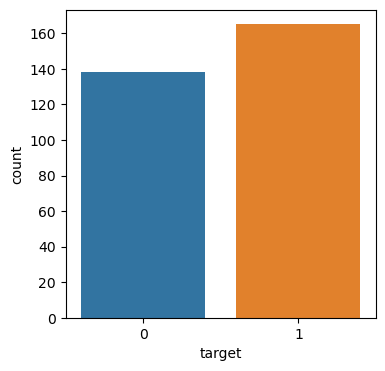

In [13]:
ax = plt.subplots(figsize=(4, 4))
ax = sns.countplot(x="target", data=heart)
plt.show()

#### Interpretation


- The above plot confirms the findings that -

- There are 165 patients suffering from heart disease, and 
   
- There are 138 patients who do not have any heart disease.

### Frequency distribution of target variable wrt sex

In [14]:
heart.groupby('sex')['target'].value_counts()

sex  target
0    1          72
     0          24
1    0         114
     1          93
Name: count, dtype: int64

 #### Comment


- `sex` variable contains two integer values 1 and 0 : (1 = male; 0 = female).

- `target` variable also contains two integer values 1 and 0 : (1 = Presence of heart disease; 0 = Absence of heart disease)

-  So, out of 96 females - 72 have heart disease and 24 do not have heart disease.

- Similarly, out of 207 males - 93 have heart disease and 114 do not have heart disease.

- We can visualize this information below.


###### We can visualize the value counts of the sex variable wrt target as follows -

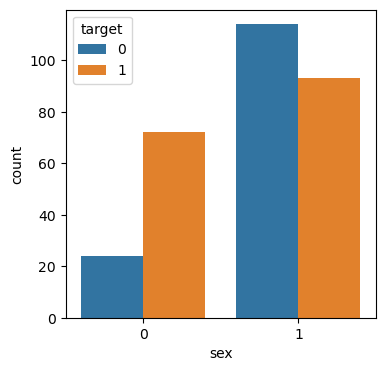

In [15]:
ax = plt.subplots(figsize=(4,4))
ax = sns.countplot(x = 'sex',hue='target',data = heart)
plt.show()

#### Interpretation

- We can see that the values of `target` variable are plotted wrt `sex` : (1 = male; 0 = female).

- `target` variable also contains two integer values 1 and 0 : (1 = Presence of heart disease; 0 = Absence of heart disease)

- The above plot confirms our findings that -

    - Out of 96 females - 72 have heart disease and 24 do not have heart disease.

    - Similarly, out of 207 males - 93 have heart disease and 114 do not have heart disease.


#### Alternatively, we can visualize the same information as follows :

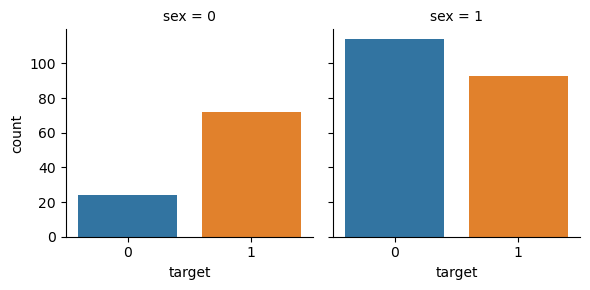

In [16]:
ax = sns.catplot(x="target", col="sex", data=heart, kind="count", height=3, aspect=1)

#### Comment


- The above plot segregate the values of `target` variable and plot on two different columns labelled as (sex = 0, sex = 1).

- I think it is more convinient way of interpret the plots.

#### We can plot the bars horizontally as follows :

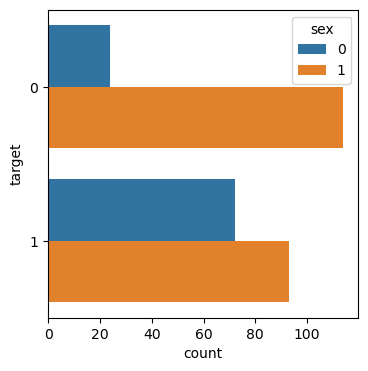

In [17]:
ax = plt.subplots(figsize=(4,4))
ax = sns.countplot(y = 'target',hue='sex',data = heart)
plt.show()

We can use a different color palette as follows :

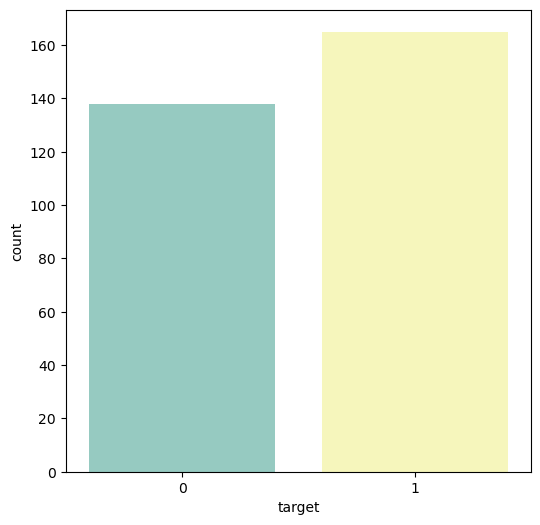

In [18]:
ax = plt.subplots(figsize=(6, 6))
ax = sns.countplot(x="target", data=heart, palette="Set3")
plt.show()

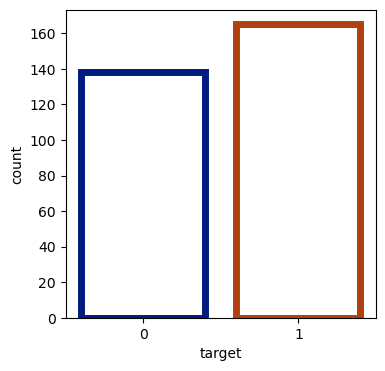

In [19]:
ax = plt.subplots(figsize=(4, 4))
ax = sns.countplot(x="target", data=heart, facecolor=(0, 0, 0, 0), linewidth=5, edgecolor=sns.color_palette("dark", 3))
plt.show()

#### Comment


- I have visualize the `target` values distribution wrt `sex`. 

- We can follow the same principles and visualize the `target` values distribution wrt `fbs (fasting blood sugar)` and `exang (exercise induced angina)`.

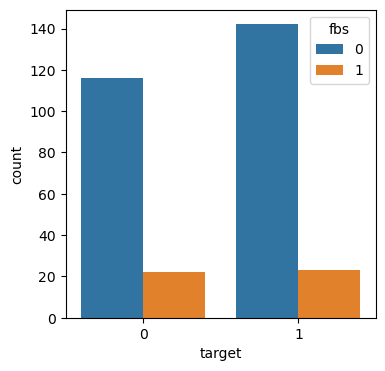

In [20]:
 ax = plt.subplots(figsize=(4, 4))
ax = sns.countplot(x="target", hue="fbs", data=heart)
plt.show()

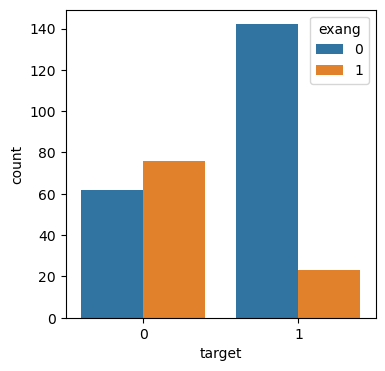

In [21]:
ax = plt.subplots(figsize=(4, 4))
ax = sns.countplot(x="target", hue="exang", data=heart)
plt.show()

### Findings of Univariate Analysis <a class="anchor" id="7.2"></a>

Findings of univariate analysis are as follows:-

-	Our feature variable of interest is `target`.

-   It refers to the presence of heart disease in the patient.

-   It is integer valued as it contains two integers 0 and 1 - (0 stands for absence of heart disease and 1 for presence of heart disease).

- `1` stands for presence of heart disease. So, there are 165 patients suffering from heart disease.

- Similarly, `0` stands for absence of heart disease. So, there are 138 patients who do not have any heart disease.

- There are 165 patients suffering from heart disease, and 
   
- There are 138 patients who do not have any heart disease.

- Out of 96 females - 72 have heart disease and 24 do not have heart disease.

- Similarly, out of 207 males - 93 have heart disease and 114 do not have heart disease.


## 8. Bivariate Analysis 

### Estimate correlation coefficients <a class="anchor" id="8.1"></a>

Our dataset is very small. So, I will compute the standard correlation coefficient (also called Pearson's r) between every pair of attributes. I will compute it using the `df.corr()` method as follows:-

In [22]:
correlation = heart.corr()

The target variable is `target`. So, we should check how each attribute correlates with the `target` variable. We can do it as follows:-

In [23]:
correlation['target'].sort_values(ascending = False)

target      1.000000
cp          0.433798
thalach     0.421741
slope       0.345877
restecg     0.137230
fbs        -0.028046
chol       -0.085239
trestbps   -0.144931
age        -0.225439
sex        -0.280937
thal       -0.344029
ca         -0.391724
oldpeak    -0.430696
exang      -0.436757
Name: target, dtype: float64

#### Interpretation of correlation coefficient

- The correlation coefficient ranges from -1 to +1. 

- When it is close to +1, this signifies that there is a strong positive correlation. So, we can see that there is no variable which has strong positive correlation with `target` variable.

- When it is clsoe to -1, it means that there is a strong negative correlation. So, we can see that there is no variable which has strong negative correlation with `target` variable.

- When it is close to 0, it means that there is no correlation. So, there is no correlation between `target` and `fbs`.

- We can see that the `cp` and `thalach` variables are mildly positively correlated with `target` variable. So, I will analyze the interaction between these features and `target` variable.



### Analysis of `target` and `cp` variable <a class="anchor" id="8.2"></a>

#### Explore `cp` variable


- `cp` stands for chest pain type.

- First, I will check number of unique values in `cp` variable.

In [24]:
heart['cp'].unique()

array([3, 2, 1, 0], dtype=int64)

So, there are 4 unique values in cp variable. Hence, it is a categorical variable.

In [25]:
heart['cp'].value_counts()

cp
0    143
2     87
1     50
3     23
Name: count, dtype: int64

### Visualize the frequency distribution of `cp` variable

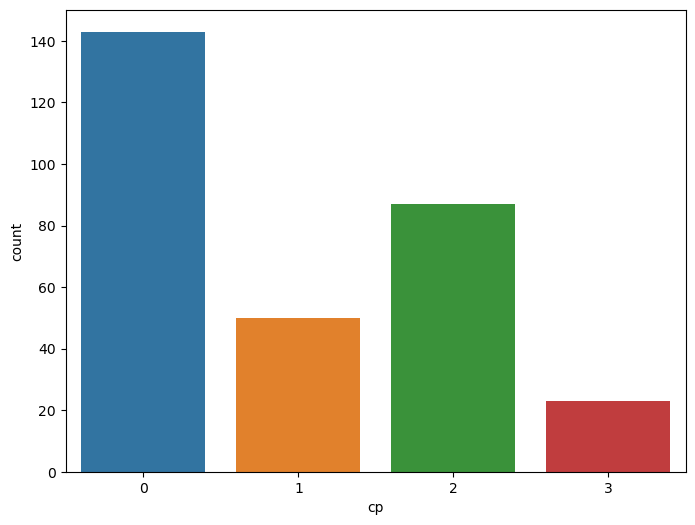

In [26]:
ax = plt.subplots(figsize=(8, 6))
ax = sns.countplot(x="cp", data=heart)
plt.show()

#### Frequency distribution of target variable wrt cp

In [27]:
heart.groupby('cp')['target'].value_counts()

cp  target
0   0         104
    1          39
1   1          41
    0           9
2   1          69
    0          18
3   1          16
    0           7
Name: count, dtype: int64

#### Comment


- `cp` variable contains four integer values 0, 1, 2 and 3.

- `target` variable contains two integer values 1 and 0 : (1 = Presence of heart disease; 0 = Absence of heart disease)

- So, the above analysis gives `target` variable values categorized into presence and absence of heart disease and groupby `cp` variable values.

- We can visualize this information below.


We can visualize the value counts of the `cp` variable wrt `target` as follows -

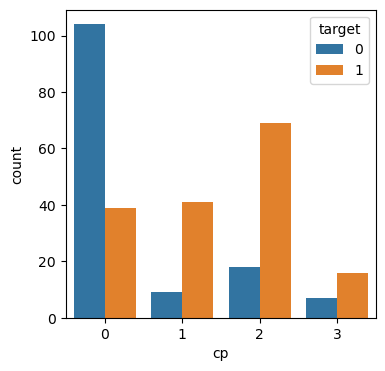

In [28]:
axes = plt.subplots(figsize=(4,4))
axes= sns.countplot(x = 'cp',hue = 'target',data = heart)

#### Interpretation

- We can see that the values of `target` variable are plotted wrt `cp`.

- `target` variable contains two integer values 1 and 0 : (1 = Presence of heart disease; 0 = Absence of heart disease)

- The above plot confirms our above findings, 

Alternatively, we can visualize the same information as follows :

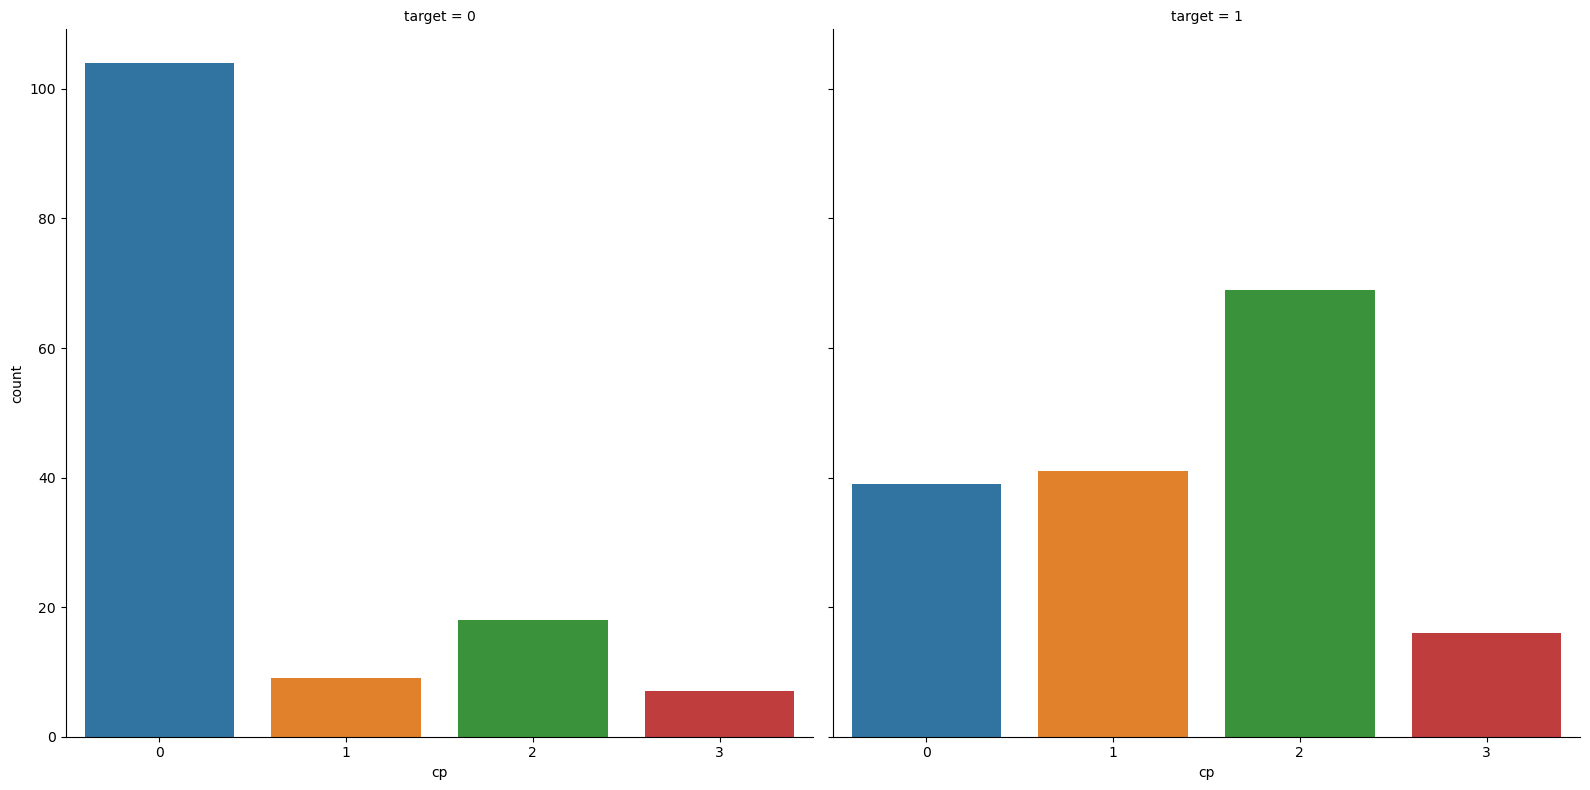

In [29]:
axes  = sns.catplot(x = 'cp',col = 'target',data = heart,kind = 'count',height = 8,aspect =  1)

## Analysis of target and thalach variable 

#### Explore thalach variable

* thalach stands for maximum heart rate achieved.
* I will check number of unique values in thalach variable as follows :

In [30]:
heart['thalach'].nunique()

91

- So, number of unique values in `thalach` variable is 91. Hence, it is numerical variable.

- I will visualize its frequency distribution of values as follows :

### Visualize the frequency distribution of `thalach` variable

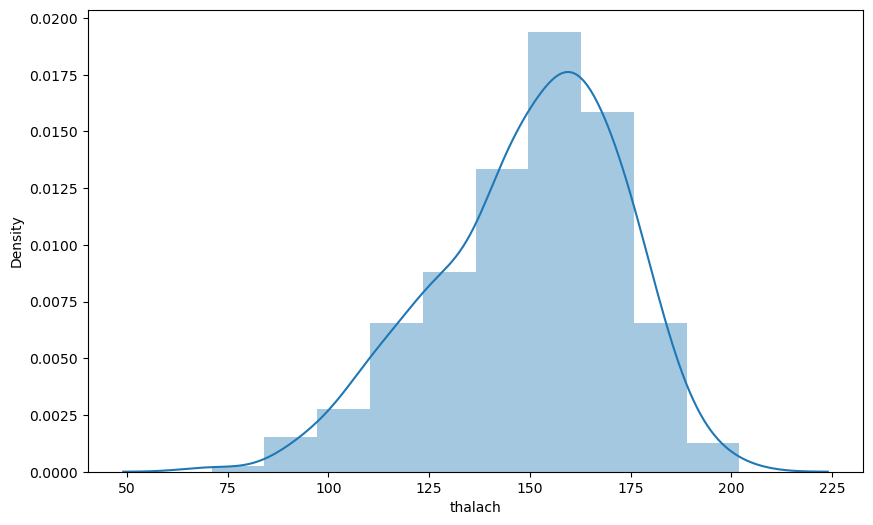

In [31]:
ax = plt.subplots(figsize=(10,6))
x = heart['thalach']
ax = sns.distplot(x, bins=10)
plt.show()

#### Comment

- We can see that the `thalach` variable is slightly negatively skewed.

We can use Pandas series object to get an informative axis label as follows :

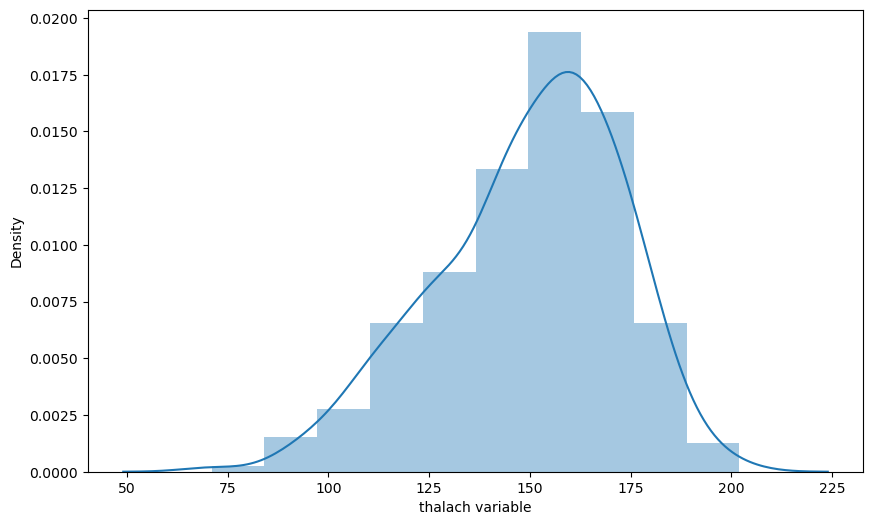

In [32]:
ax = plt.subplots(figsize=(10,6))
x = heart['thalach']
x = pd.Series(x, name="thalach variable")
ax = sns.distplot(x, bins=10)
plt.show()

We can plot the distribution on the vertical axis as follows:-

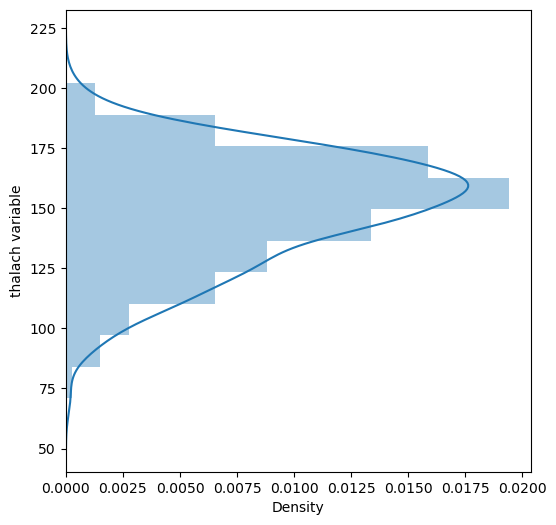

In [33]:
ax = plt.subplots(figsize=(6,6))
x = heart['thalach']
x = pd.Series(x, name="thalach variable")
ax = sns.distplot(x, bins=10, vertical = True)
plt.show()

#### Seaborn Kernel Density Estimation (KDE) Plot


- The kernel density estimate (KDE) plot is a useful tool for plotting the shape of a distribution.

- The KDE plot plots the density of observations on one axis with height along the other axis.

- We can plot a KDE plot as follows :

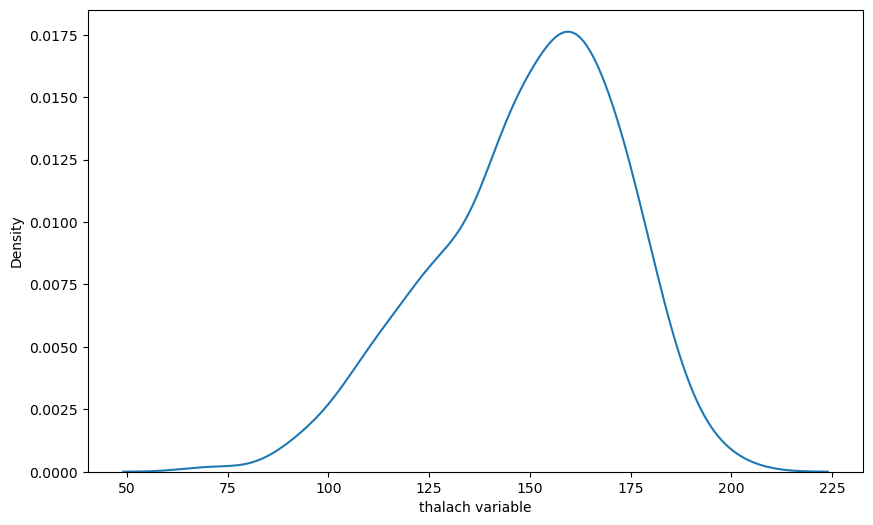

In [36]:
ax = plt.subplots(figsize=(10,6))
x = heart['thalach']
x = pd.Series(x, name="thalach variable")
ax = sns.kdeplot(x)
plt.show()

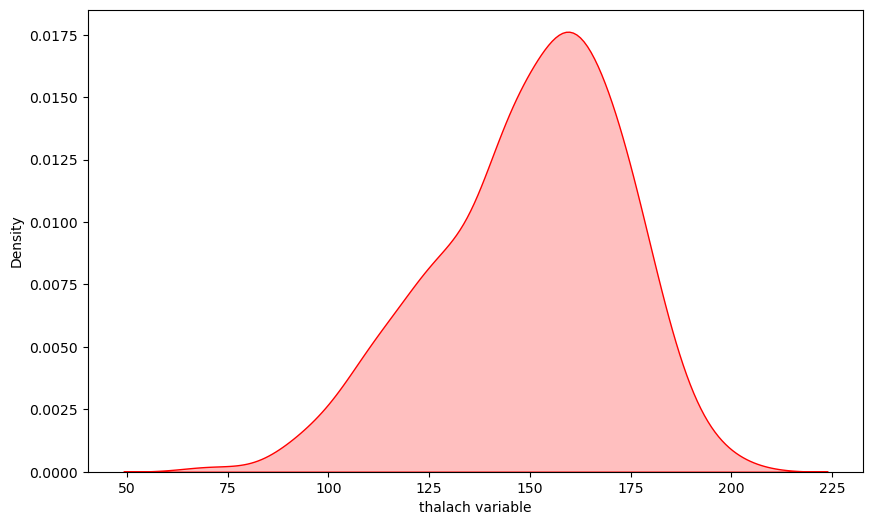

In [38]:
ax = plt.subplots(figsize=(10,6))
x = heart['thalach']
x = pd.Series(x, name="thalach variable")
ax = sns.kdeplot(x, shade=True, color='r')
plt.show()

#### Histogram

- A histogram represents the distribution of data by forming bins along the range of the data and then drawing bars to show the number of observations that fall in each bin.

- We can plot a histogram as follows :

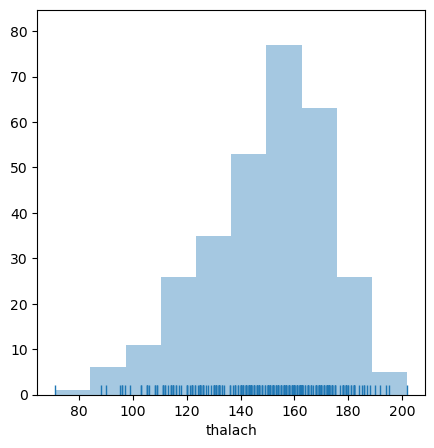

In [56]:
ax = plt.subplots(figsize=(5,5))
x = heart['thalach']
ax = sns.distplot(x, kde=False, rug=True, bins=10)
plt.show()

### Visualize frequency distribution of thalach variable wrt target

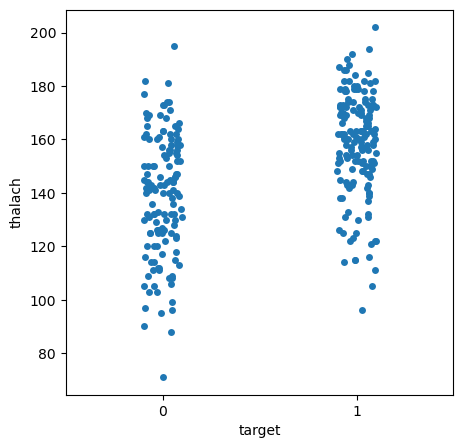

In [57]:
ax = plt.subplots(figsize=(5, 5))
sns.stripplot(x='target', y="thalach", data=heart)
plt.show()

#### Interpretation

- We can see that those people suffering from heart disease (target = 1) have relatively higher heart rate (thalach) as compared to people who are not suffering from heart disease (target = 0).

We can add jitter to bring out the distribution of values as follows :

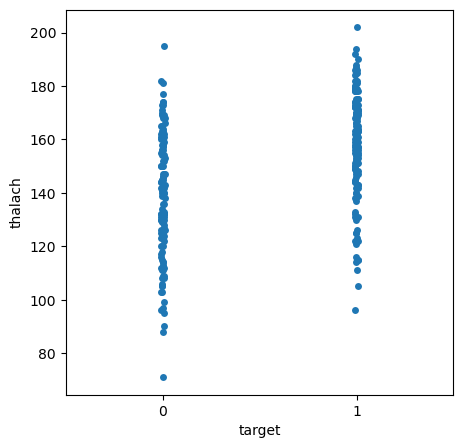

In [69]:
ax = plt.subplots(figsize=(5,5))
sns.stripplot(x ='target',y = 'thalach', data = heart,jitter = 0.01)
plt.show()

#### Visualize distribution of `thalach` variable wrt `target` with boxplot

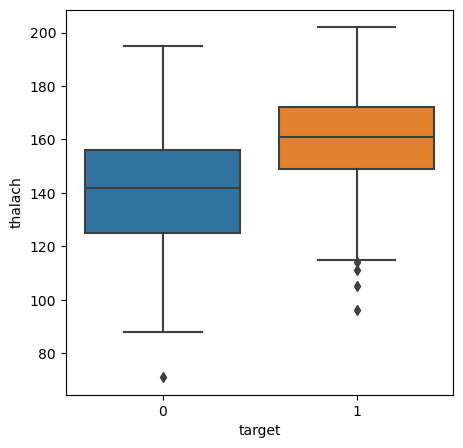

In [70]:
ax = plt.subplots(figsize=(5,5))
sns.boxplot(x ='target',y = 'thalach', data = heart)
plt.show()

#### Interpretation

The above boxplot confirms our finding that people suffering from heart disease (target = 1) have relatively higher heart rate (thalach) as compared to people who are not suffering from heart disease (target = 0).

### Findings of Bivariate Analysis <a class="anchor" id="8.4"></a>

Findings of Bivariate Analysis are as follows –


- There is no variable which has strong positive correlation with `target` variable.

- There is no variable which has strong negative correlation with `target` variable.

- There is no correlation between `target` and `fbs`.

- The `cp` and `thalach` variables are mildly positively correlated with `target` variable. 

- We can see that the `thalach` variable is slightly negatively skewed.

- The people suffering from heart disease (target = 1) have relatively higher heart rate (thalach) as compared to people who are not suffering from heart disease (target = 0).

- The people suffering from heart disease (target = 1) have relatively higher heart rate (thalach) as compared to people who are not suffering from heart disease (target = 0).


## 9. Multivariate analysis <a class="anchor" id="9"></a>


[Back to Table of Contents](#0.1)


- The objective of the multivariate analysis is to discover patterns and relationships in the dataset.

### Discover patterns and relationships

- An important step in EDA is to discover patterns and relationships between variables in the dataset. 

- I will use `heat map` and `pair plot` to discover the patterns and relationships in the dataset.

- First of all, I will draw a `heat map`.

### Heat Map <a class="anchor" id="9.1"></a>

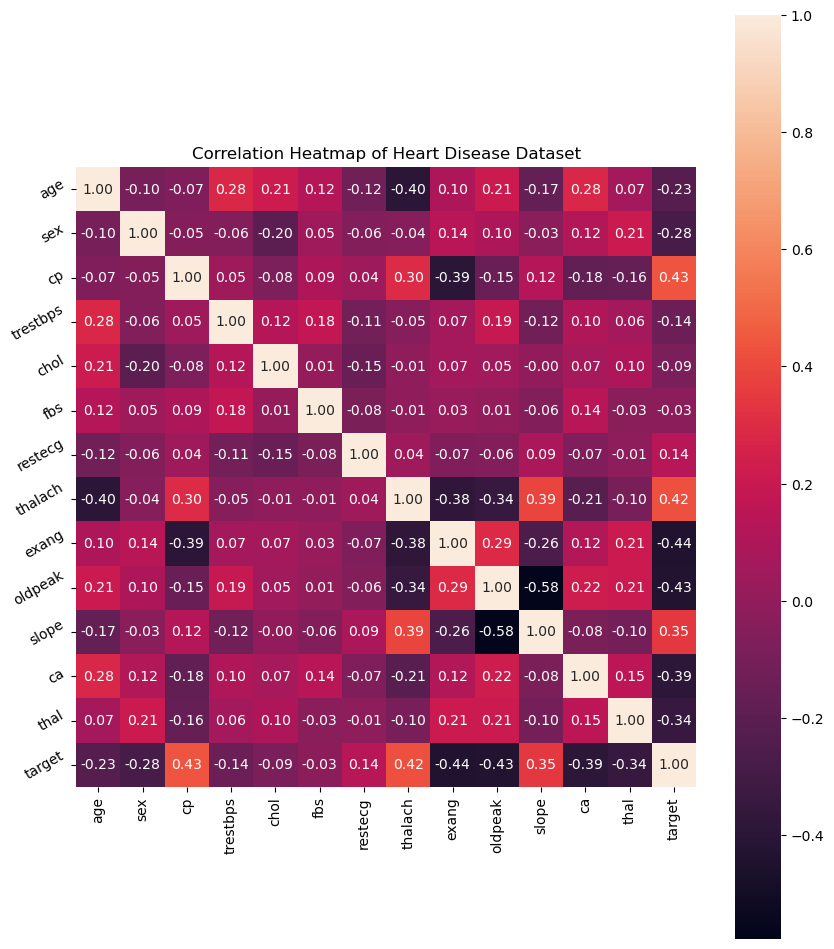

In [80]:
plt.figure(figsize=(10,12))
plt.title('Correlation Heatmap of Heart Disease Dataset')
a = sns.heatmap(correlation, square=True, annot=True, fmt='.2f', linecolor='white')
a.set_xticklabels(a.get_xticklabels(), rotation=90)
a.set_yticklabels(a.get_yticklabels(), rotation=30)           
plt.show()

#### Interpretation

From the above correlation heat map, we can conclude that :-

- `target` and `cp` variable are mildly positively correlated (correlation coefficient = 0.43).

- `target` and `thalach` variable are also mildly positively correlated (correlation coefficient = 0.42).

- `target` and `slope` variable are weakly positively correlated (correlation coefficient = 0.35).

- `target` and `exang` variable are mildly negatively correlated (correlation coefficient = -0.44).

- `target` and `oldpeak` variable are also mildly negatively correlated (correlation coefficient = -0.43).

- `target` and `ca` variable are weakly negatively correlated (correlation coefficient = -0.39).

- `target` and `thal` variable are also waekly negatively correlated (correlation coefficient = -0.34).



### Pair Plot <a class="anchor" id="9.2"></a>

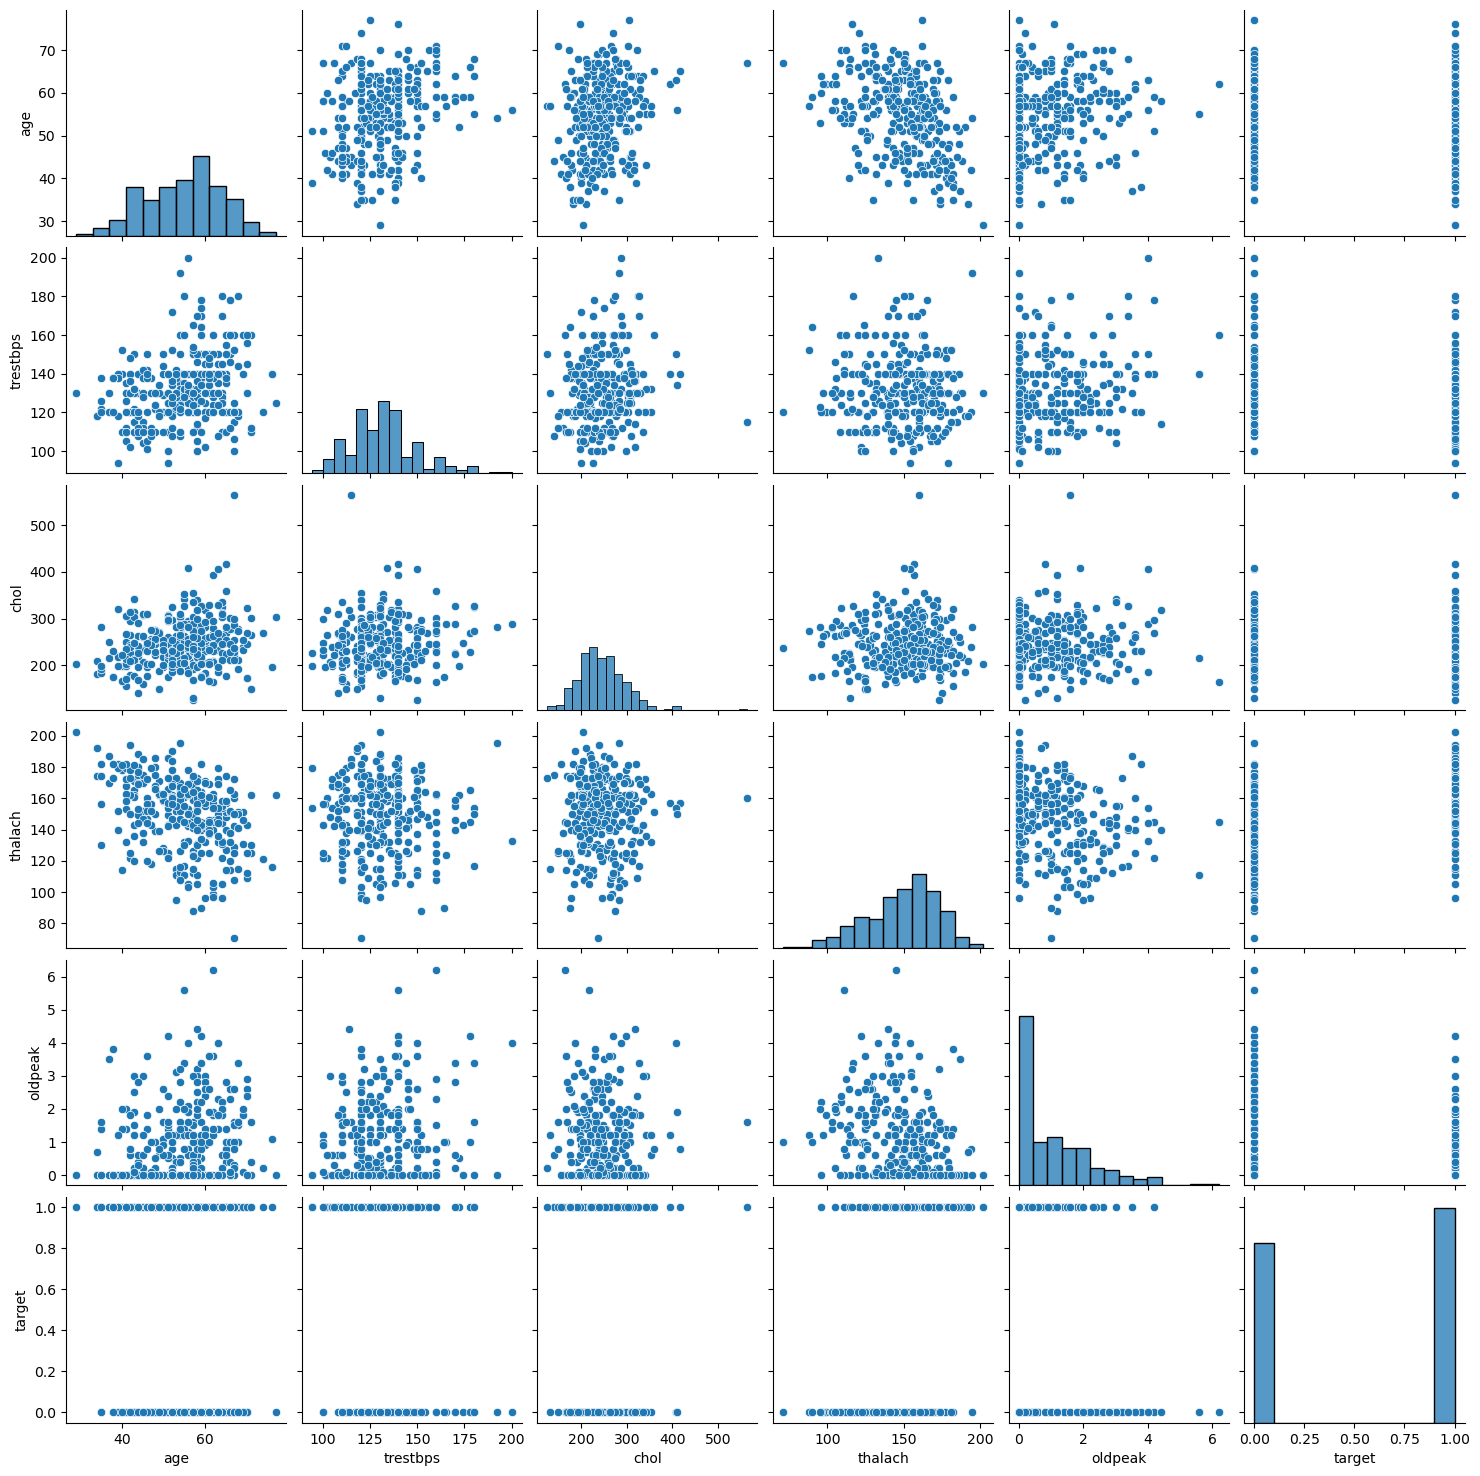

In [84]:
num_var = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'target' ]
sns.pairplot(heart[num_var], kind='scatter', diag_kind='hist')
plt.show()

#### Comment


- I have defined a variable `num_var`. Here `age`, `trestbps`, ``chol`, `thalach` and `oldpeak`` are numerical variables and `target` is the categorical variable.

- So, I wll check relationships between these variables.

### Analysis of `age` and other variables

#### Check the number of unique values in `age` variable

In [85]:
heart['age'].nunique()

41

In [86]:
heart['age'].describe()

count    303.000000
mean      54.366337
std        9.082101
min       29.000000
25%       47.500000
50%       55.000000
75%       61.000000
max       77.000000
Name: age, dtype: float64

#### Plot the distribution of `age` variable

Now, I will plot the distribution of `age` variable to view the statistical properties.

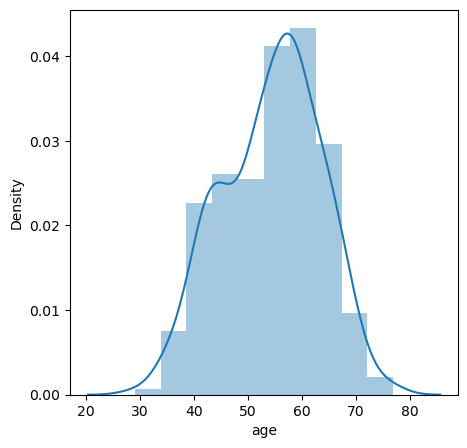

In [94]:
 ax = plt.subplots(figsize=(5,5))
x = heart['age']
ax = sns.distplot(x, bins=10)
plt.show()

#### Interpretation

- The `age` variable distribution is approximately normal.

### Analyze age and target variable
Visualize frequency distribution of age variable wrt target

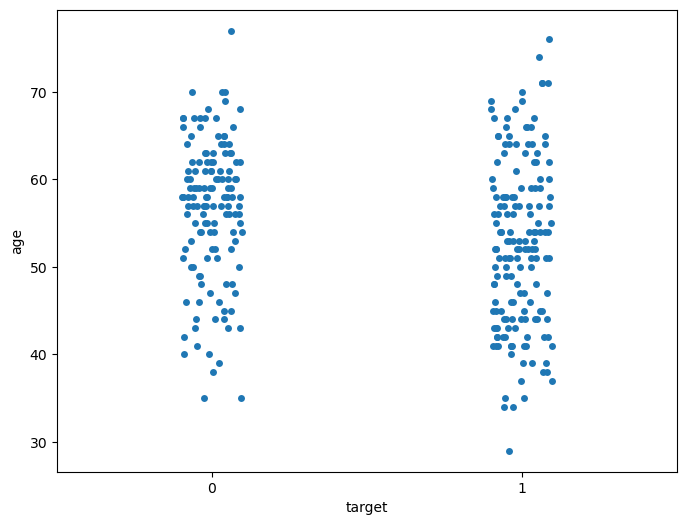

In [97]:
ax = plt.subplots(figsize=(8, 6))
sns.stripplot(x="target", y="age", data=heart)
plt.show()

#### Interpretation

- We can see that the people suffering from heart disease (target = 1) and people who are not suffering from heart disease (target = 0) have comparable ages.

#### Visualize distribution of `age` variable wrt `target` with boxplot


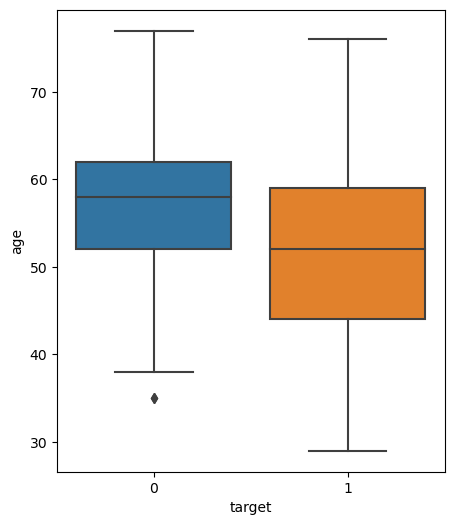

In [100]:
ax = plt.subplots(figsize = (5,6))
sns.boxplot(x = 'target', y = 'age', data = heart)
plt.show()

#### Interpretation

- The above boxplot tells two different things :

  - The mean age of the people who have heart disease is less than the mean age of the people who do not have heart disease.
  
  - The dispersion or spread of age of the people who have heart disease is greater than the dispersion or spread of age of the people who do not have heart disease.


### Analyze `age` and `trestbps` variable

I will plot a scatterplot to visualize the relationship between `age` and `trestbps` variable.

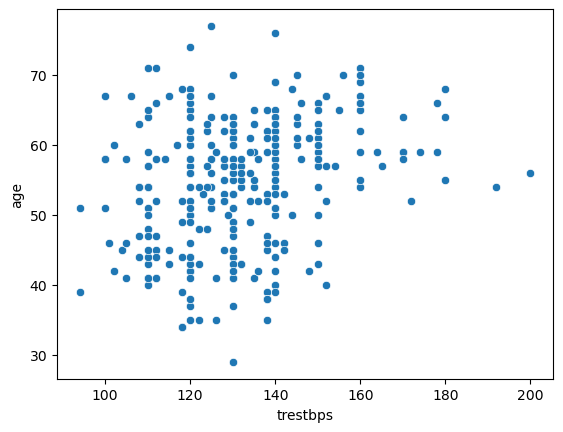

In [101]:
sns.scatterplot(x = 'trestbps', y = 'age',data = heart)
plt.show()

#### Interpretation

- The above scatter plot shows that there is no correlation between `age` and `trestbps` variable.

### Analyze `age` and `chol` variable

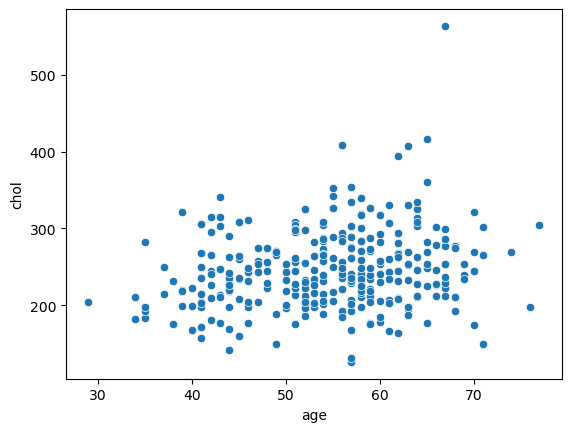

In [105]:
sns.scatterplot(x="age", y="chol", data=heart)
plt.show()

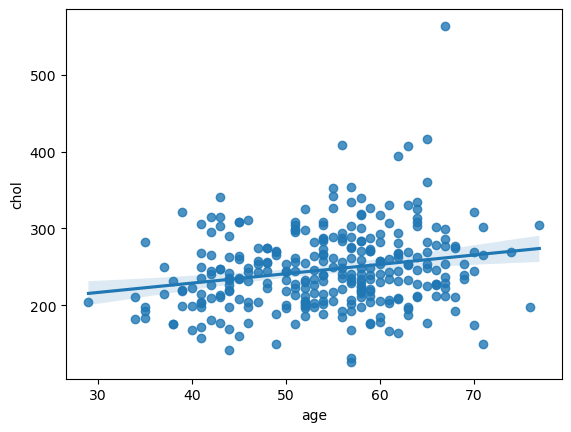

In [106]:
sns.regplot(x="age", y="chol", data=heart)
plt.show()

#### Interpretation

- The above plot confirms that there is a slighly positive correlation between `age` and `chol` variables.

### Analyze `chol` and `thalach` variable

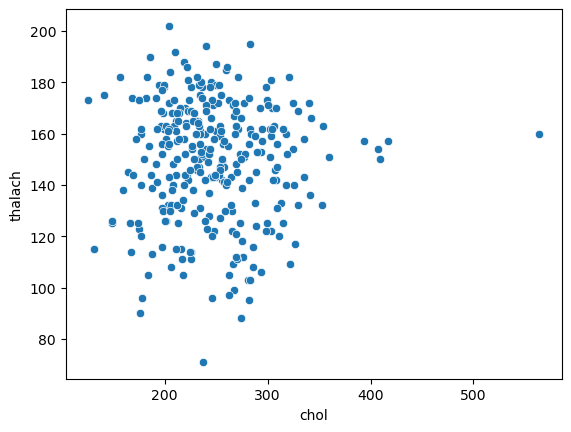

In [109]:
sns.scatterplot(x="chol", y = "thalach", data=heart)
plt.show()

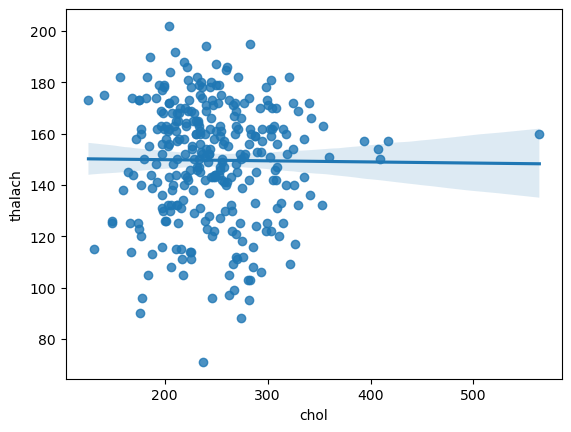

In [111]:
 sns.regplot(x="chol", y = "thalach", data=heart)
plt.show()

#### Interpretation


- The above plot shows that there is no correlation between `chol` and `thalach` variable.

## 10. Dealing with missing values <a class="anchor" id="10"></a>

[Back to Table of Contents](#0.1)


-	In Pandas missing data is represented by two values:

  -	**None**: None is a Python singleton object that is often used for missing data in Python code.
  
  -	**NaN** : NaN (an acronym for Not a Number), is a special floating-point value recognized by all systems that use the standard IEEE floating-point representation.


-  There are different methods in place on how to detect missing values.


### Pandas isnull() and notnull() functions <a class="anchor" id="10.1"></a>


- Pandas offers two functions to test for missing data - `isnull()` and `notnull()`. These are simple functions that return a boolean value indicating whether the passed in argument value is in fact missing data.

-  Below, I will list some useful commands to deal with missing values.


### Useful commands to detect missing values <a class="anchor" id="10.2"></a>

-	**df.isnull()**

The above command checks whether each cell in a dataframe contains missing values or not. If the cell contains missing value, it returns True otherwise it returns False.


-	**df.isnull().sum()**

The above command returns total number of missing values in each column in the dataframe.


-	**df.isnull().sum().sum()** 

It returns total number of missing values in the dataframe.


-	**df.isnull().mean()**

It returns percentage of missing values in each column in the dataframe.


-	**df.isnull().any()**

It checks which column has null values and which has not. The columns which has null values returns TRUE and FALSE otherwise.

-	**df.isnull().any().any()**

It returns a boolean value indicating whether the dataframe has missing values or not. If dataframe contains missing values it returns TRUE and FALSE otherwise.


-	**df.isnull().values.any()**

It checks whether a particular column has missing values or not. If the column contains missing values, then it returns TRUE otherwise FALSE.


-	**df.isnull().values.sum()**


It returns the total number of missing values in the dataframe.



In [112]:
heart.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

#### Interpretation

We can see that there are no missing values in the dataset.

## 11. Check with ASSERT statement <a class="anchor" id="11"></a>


[Back to Table of Contents](#0.1)


- We must confirm that our dataset has no missing values. 

- We can write an **assert statement** to verify this. 

- We can use an assert statement to programmatically check that no missing, unexpected 0 or negative values are present. 

- This gives us confidence that our code is running properly.

- **Assert statement** will return nothing if the value being tested is true and will throw an AssertionError if the value is false.

- **Asserts**

  - assert 1 == 1 (return Nothing if the value is True)

  - assert 1 == 2 (return AssertionError if the value is False)

In [114]:
#assert that there are no missing values in the dataframe

assert pd.notnull(heart).all().all()


In [117]:
#assert all values are greater than or equal to 0

assert (heart >= 0).all().all()


#### Interpretation

- The above two commands do not throw any error. Hence, it is confirmed that there are no missing or negative values in the dataset. 

- All the values are greater than or equal to zero.

## 12. Outlier detection

I will make boxplots to visualise outliers in the continuous numerical variables : -

`age`, `trestbps`, `chol`, `thalach` and  `oldpeak` variables.


### `age` variable

In [119]:
heart['age'].describe()

count    303.000000
mean      54.366337
std        9.082101
min       29.000000
25%       47.500000
50%       55.000000
75%       61.000000
max       77.000000
Name: age, dtype: float64

#### Box-plot of `age` variable

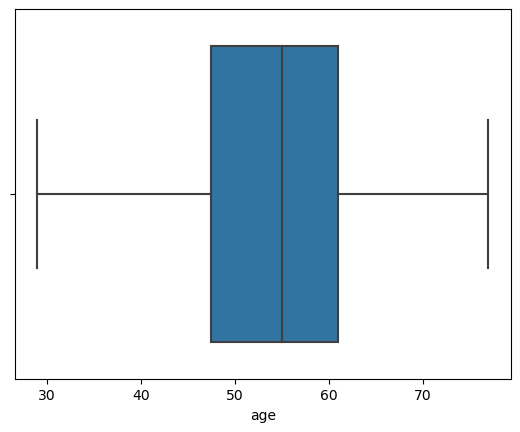

In [124]:
sns.boxplot(x = 'age',data = heart)
plt.show()

### `trestbps` variable

In [126]:
heart['trestbps'].describe()

count    303.000000
mean     131.623762
std       17.538143
min       94.000000
25%      120.000000
50%      130.000000
75%      140.000000
max      200.000000
Name: trestbps, dtype: float64

#### Box-plot of `trestbps` variable

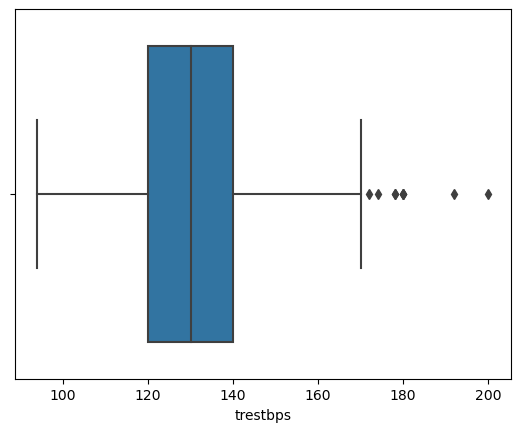

In [127]:
sns.boxplot(x = heart['trestbps'])
plt.show()

### `chol` variable


In [128]:
heart['chol'].describe()

count    303.000000
mean     246.264026
std       51.830751
min      126.000000
25%      211.000000
50%      240.000000
75%      274.500000
max      564.000000
Name: chol, dtype: float64

#### Box-plot of `chol` variable

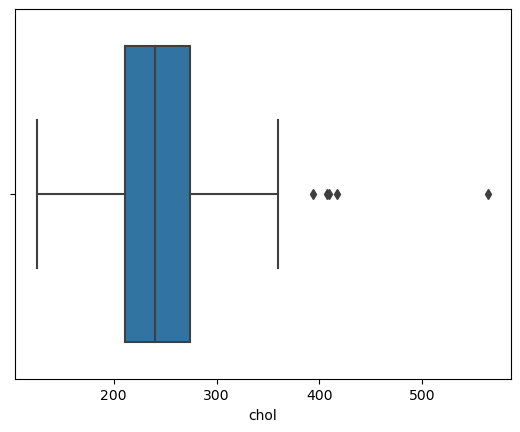

In [129]:
sns.boxplot(x = heart['chol'])
plt.show()

### `thalach` variable

In [130]:
heart['thalach'].describe()

count    303.000000
mean     149.646865
std       22.905161
min       71.000000
25%      133.500000
50%      153.000000
75%      166.000000
max      202.000000
Name: thalach, dtype: float64

#### Box-plot of `thalach` variable

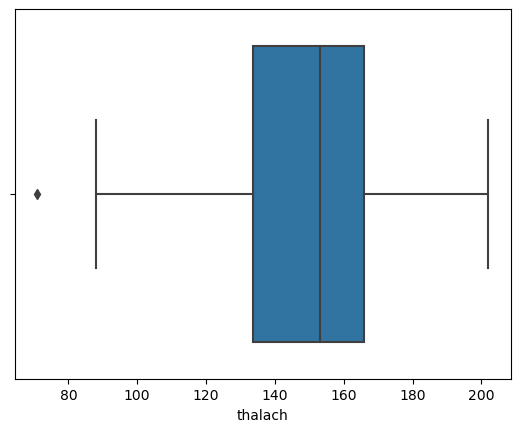

In [131]:
sns.boxplot(x = heart['thalach'])
plt.show()

### `oldpeak` variable

In [133]:
heart['oldpeak'].describe()

count    303.000000
mean       1.039604
std        1.161075
min        0.000000
25%        0.000000
50%        0.800000
75%        1.600000
max        6.200000
Name: oldpeak, dtype: float64

#### Box-plot of `oldpeak` variable

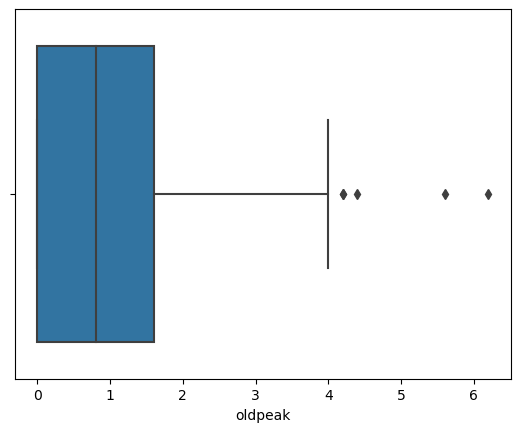

In [134]:
sns.boxplot(x =  heart['oldpeak'])
plt.show()

#### Findings

- The `age` variable does not contain any outlier.

- `trestbps` variable contains outliers to the right side.

- `chol` variable also contains outliers to the right side.

- `thalach` variable contains a single outlier to the left side.

- `oldpeak` variable contains outliers to the right side.

- Those variables containing outliers needs further investigation.

## 13. Conclusion

In this kernel, we have explored the heart disease dataset. In this kernel, we have implemented many of the strategies presented in the book **Think Stats - Exploratory Data Analysis in Python by Allen B Downey** . The feature variable of interest is `target` variable. We have analyzed it alone and check its interaction with other variables. We have also discussed how to detect missing data and outliers.

## 14. References <a class="anchor" id="14"></a>

[Back to Table of Contents](#0.1)


The following references are used to create this kernel


- Think Stats - Exploratory Data Analysis in Python by Allen B Downey

- [Seaborn API reference](http://seaborn.pydata.org/api.html)

- [My other kernel](https://www.kaggle.com/prashant111/comprehensive-seaborn-tutorial-for-beginners)